In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('us-stocks.csv',index_col=0).iloc[:,:100] # we take arbitrary the 100 first stocks
data

,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,KO,...,GRA,LPX,VLO,WMB,TXI,CI,NVO,OMX,NSC,ALK
1,16.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,17.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,1868.20,25.76,186.22,81.38,124.43,96.82,12.17,29.59,66.43,38.47,...,102.24,17.05,55.29,41.18,85.79,79.30,46.02,NaN,96.09,88.83
16288,1846.34,25.34,183.90,79.93,121.89,95.61,11.86,28.91,65.71,37.97,...,101.68,17.01,54.04,41.00,84.66,77.68,45.71,NaN,95.24,87.41
16289,1841.13,25.11,182.21,80.07,123.11,95.39,11.84,29.07,65.77,38.17,...,101.32,16.97,54.23,41.41,85.27,76.55,45.55,NaN,94.53,91.49
16290,1858.83,25.43,185.81,81.39,125.42,95.67,11.90,29.48,66.38,38.27,...,101.55,16.93,54.32,41.53,85.86,77.78,45.81,NaN,95.83,91.90


In [7]:
index = data.index
names_col = data.columns

In [31]:
def number_na(dataframe):
    #return the number of NA value from a DataFrame
    return dataframe.isna().sum()

def hist_na_market(data,names):
    #take a dataset and its columns to give the number of NA per columns
    num_na = np.array([number_na(data.iloc[:,i]) for i in range(len(names))])
    fig = plt.figure(1, figsize=(18, 9))
    plt.bar(names,num_na)
    plt.xticks(rotation=90)
    plt.ylabel('number of NA')
    plt.show()
    return
    
def evolution_na(data,index):
    #take a dataset and plot the evolution of NA througth the index
    num_na = np.array([number_na(data.iloc[i,:]) for i in range(len(index))])
    fig = plt.figure(1, figsize=(18, 9))
    plt.plot(index,num_na)
    plt.xlabel('time')
    plt.ylabel('number of NA')
    plt.show()
    return
    


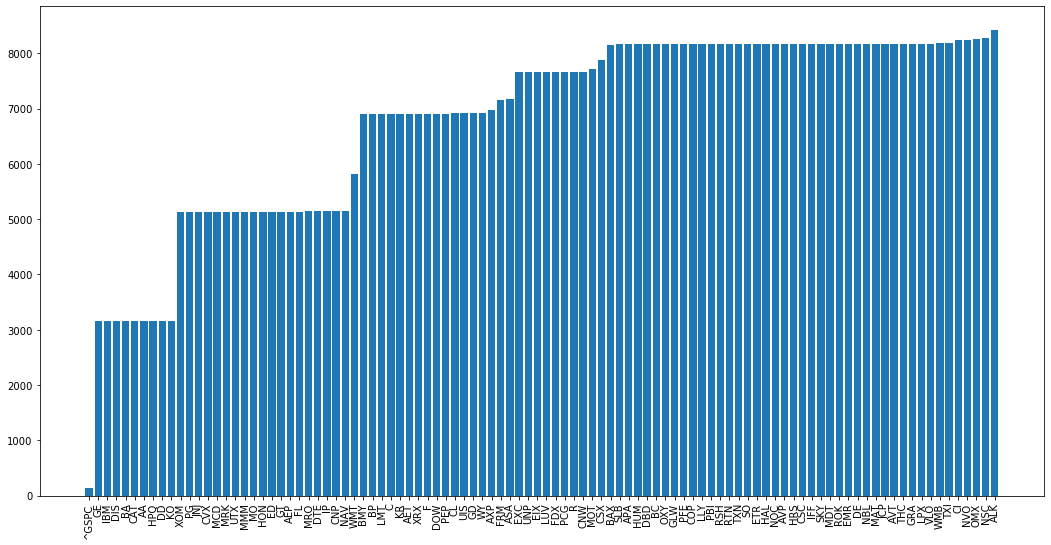

In [28]:
hist_na_market(data,names_col)

D:\Python_file\envs\EPFL_SEM3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Python_file\envs\EPFL_SEM3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


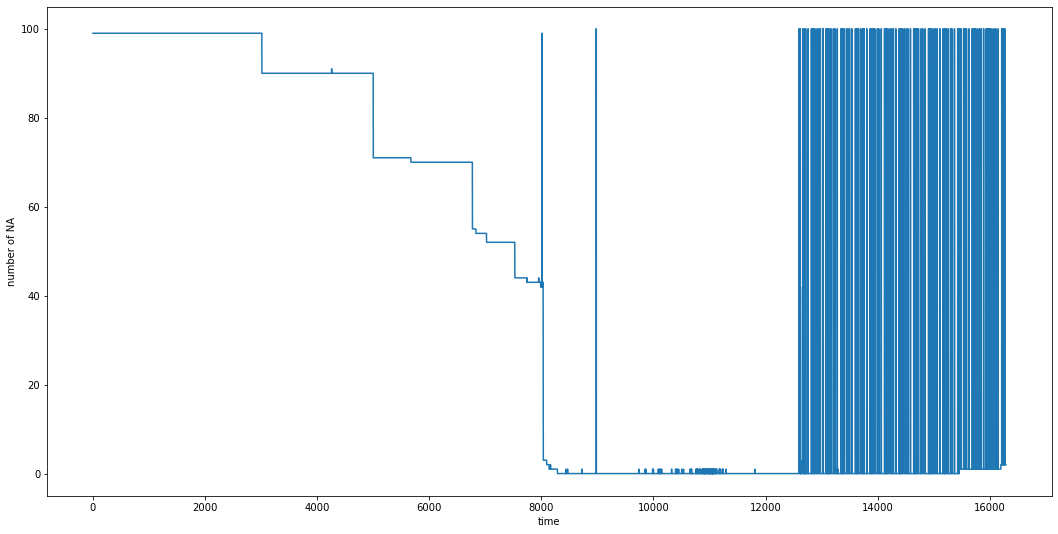

In [32]:
evolution_na(data,index)

because at first the number of NA is almost strickly deacreasing at first we can't use HY or the other algorithm before time 8000

To use the correlation efficiently we can choose to select the data where we do not have a lot a missing value. So we will select the time where the number of 'NA' does not exeed 20.

In [43]:
def restrain_data(data,index,number_na_limit):
    
    num_na = np.array([number_na(data.iloc[i,:]) for i in range(len(index))])
    filtere = np.argwhere(num_na<number_na_limit).T[0]
    
    return index[filtere],data.iloc[filtere,:]
    
    
    

In [47]:
index_clean,data_clean = restrain_data(data,index,20)

In [46]:
len(index_clean)

8117

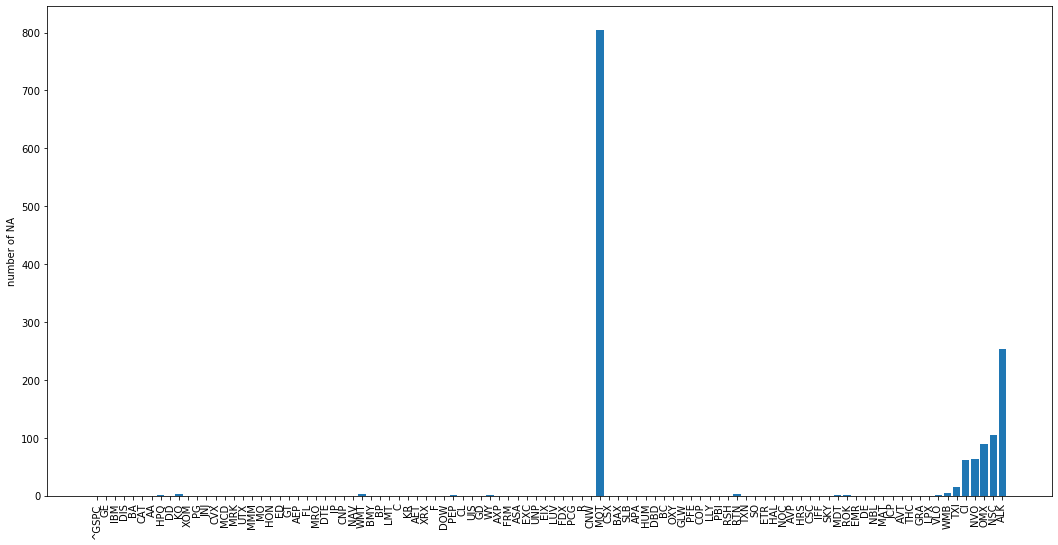

In [44]:
hist_na_market(data_clean,names_col)

D:\Python_file\envs\EPFL_SEM3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Python_file\envs\EPFL_SEM3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


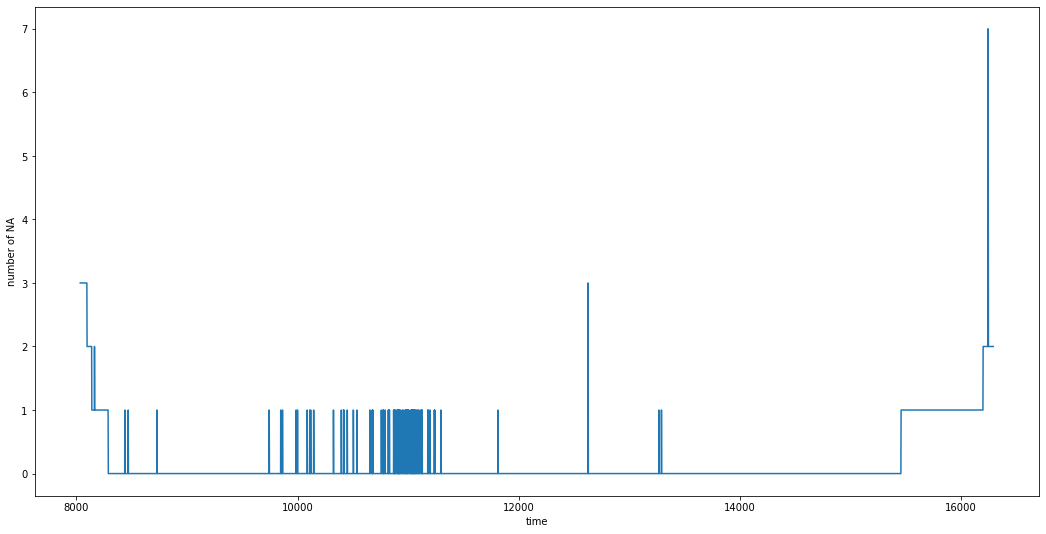

In [45]:
evolution_na(data_clean,index_clean)

In [48]:
data_clean.to_csv('data_clean.csv')